### Домашнее задание

1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. сделать feature engineering
3. обучить любой классификатор (какой вам нравится)
4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
5. применить random negative sampling для построения классификатора в новых условиях
6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)
7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import itertools

In [2]:
# https://www.kaggle.com/yasserh/heart-disease-dataset
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
categorial_feature = ['cp','restecg','slope','ca','thal']
numeric_feature = ['age','trestbps','chol','thalach','oldpeak']
binar_feature = ['sex','fbs','exang']

In [7]:
print(df['cp'].value_counts())

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


In [8]:
print(df['restecg'].value_counts())

1    152
0    147
2      4
Name: restecg, dtype: int64


In [9]:
print(df['restecg'].value_counts())

1    152
0    147
2      4
Name: restecg, dtype: int64


In [10]:
print(df['slope'].value_counts())

2    142
1    140
0     21
Name: slope, dtype: int64


In [11]:
print(df['ca'].value_counts())

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


In [12]:
print(df['thal'].value_counts())

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [13]:
print(df['sex'].value_counts())
print(df['fbs'].value_counts())
print(df['exang'].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
0    204
1     99
Name: exang, dtype: int64


In [14]:
print(df['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [15]:
transformer = ColumnTransformer([('categories', OneHotEncoder(), categorial_feature),\
                          ('numbers', StandardScaler(), numeric_feature)],\
                         remainder='passthrough')

In [16]:
pipeline = Pipeline([
    ('transformer',transformer),
    ('classifier', LogisticRegression(random_state = 42))])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], test_size=0.3, random_state=0)

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories', OneHotEncoder(),
                                                  ['cp', 'restecg', 'slope',
                                                   'ca', 'thal']),
                                                 ('numbers', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Best Threshold=0.422217, F-Score=0.871, Precision=0.815, Recall=0.936
Confusion matrix, without normalization
[[34 10]
 [ 3 44]]


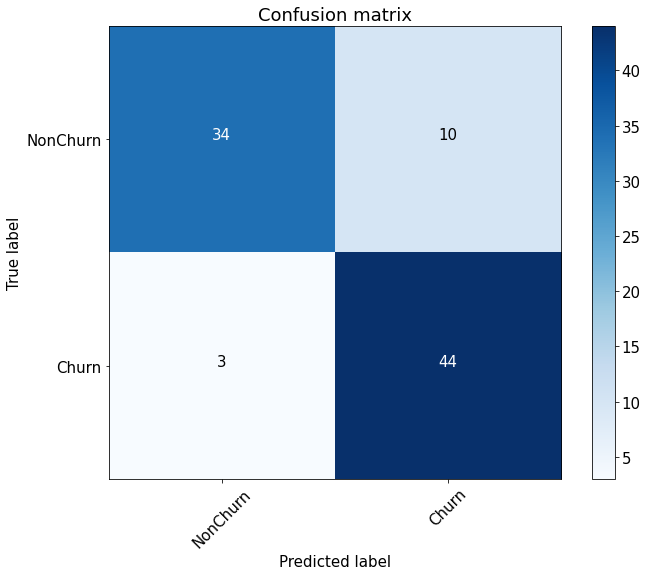

In [20]:
preds = pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))
font = {'size' : 15}
plt.rc('font', **font)
cnf_matrix = confusion_matrix(y_test, preds>=thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                     title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [21]:
def scoring(pipeline, X_test, y_test):
    preds = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    cnf_matrix = confusion_matrix(y_test, preds>=thresholds[ix])
    return [precision[ix], recall[ix],  fscore[ix], cnf_matrix[1,1], \
            cnf_matrix[0,1], cnf_matrix[0,0], cnf_matrix[1,0]]

In [22]:
result = []
target_count = df['target'].value_counts()
result.append(['Р - начальный',target_count[0], target_count[1]] + scoring(pipeline, X_test, y_test))

### Изменим соотношение размеченной и не размеченной части датасета 

In [23]:
tr = df[df['target']==1].index
part_target_1 = int(len(tr)/5)

for i in range(1, 5):
    df_u = df.copy()
    df_u['target']=0
    df_u.loc[tr[part_target_1*i:len(tr)],'target' ]=1
    target_count = df_u['target'].value_counts() 
    X_train, X_test, y_train, y_test = train_test_split(df_u.drop('target', axis = 1), df_u['target'], test_size=0.3, random_state=0)
    pipeline.fit(X_train, y_train)
    result.append(['P {}/{} '.format((5-i), 5), target_count[0], target_count[1]] + scoring(pipeline, X_test, y_test))

<ipython-input-21-2c9fad6d9bf0>:4: RuntimeWarning: invalid value encountered in true_divide
  fscore = (2 * precision * recall) / (precision + recall)


In [24]:
columns = ['Часть POSITIVE', 'Unlabeled', 'Positive','precision', 'recall',  'fscore', 'TP', 'FP', 'TN', 'FN']
result_final = pd.DataFrame(result, columns=columns)

In [25]:
result_final

,Часть POSITIVE,Unlabeled,Positive,precision,recall,fscore,TP,FP,TN,FN
0,Р - начальный,138,165,0.814815,0.936170,0.871287,44,10,34,3
1,P 4/5,171,132,0.622642,0.868421,0.725275,33,20,33,5
2,P 3/5,204,99,0.666667,0.689655,0.677966,20,10,52,9
3,P 2/5,237,66,0.541667,0.650000,0.590909,13,11,60,7
4,P 1/5,270,33,0.000000,0.000000,NaN,0,6,74,11
